In [34]:
import os
import sys

import pandas as pd
from datasets import load_from_disk
import matplotlib.pyplot as plt
import seaborn as sns

# %pip install torch==1.10.0
# %pip install datasets==1.5.0
# %pip install transformers==4.5.0
# %pip install tqdm==4.41.1
# %pip install pandas==1.1.4
# %pip install scikit-learn==0.24.1
# %pip install konlpy==0.5.2
# %pip install matplotlib
# %pip install seaborn

In [35]:
train_dataset = load_from_disk("/opt/ml/input/data/train_dataset/")
test_dataset = load_from_disk("/opt/ml/input/data/test_dataset/")

In [36]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [37]:
def preprocess(text):
    text = text.replace('\\n', ' ')
    text = text.replace('\n', ' ')
    text = re.sub(' +', ' ', text)
    return text

In [38]:
contexts = train_dataset['train']['context']
contexts = list(map(preprocess, contexts))
print(contexts[0])

미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다. 미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다. 미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05


In [39]:
test_dataset

DatasetDict({
    validation: Dataset({
        features: ['id', 'question'],
        num_rows: 600
    })
})

In [40]:
train_df = pd.DataFrame(train_dataset['train'])
val_df = pd.DataFrame(train_dataset['validation'])
test_df = pd.DataFrame(test_dataset['validation'])

In [41]:
# train_df.to_csv('/opt/ml/input/data/train.csv', index=False)
# val_df.to_csv('/opt/ml/input/data/val.csv', index=False)
# test_df.to_csv('/opt/ml/input/data/test.csv', index=False)

In [42]:
import json

with open("/opt/ml/input/data/wikipedia_documents.json", "r") as wiki_json:
    wiki_data = json.load(wiki_json)

with open("/opt/ml/input/predictions.json", "r") as predictions_json:
    preds = json.load(predictions_json)

In [43]:
print(len(wiki_data))

60613


In [44]:
# output = pd.DataFrame()
# for _, value in wiki_data.items():
#     data = pd.DataFrame([value])
#     output = pd.concat([output, data], ignore_index=True)
# output.to_csv('wikipedia_corpus.csv', index=False)

In [45]:
output = pd.read_csv('wikipedia_corpus.csv')

In [46]:
output.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,NaN,나라 목록,NaN,NaN,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,NaN,나라 목록,NaN,NaN,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,NaN,백남준,NaN,NaN,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,4


In [47]:
output['text_length'] = [len(x) for x in output['text']]

In [48]:
output.describe()

,domain,author,html,document_id,text_length
count,0.0,0.0,0.0,60613.00000,60613.000000
mean,NaN,NaN,NaN,30306.00000,755.565044
std,NaN,NaN,NaN,17497.61027,762.962671
min,NaN,NaN,NaN,0.00000,184.000000
25%,NaN,NaN,NaN,15153.00000,414.000000
50%,NaN,NaN,NaN,30306.00000,577.000000
75%,NaN,NaN,NaN,45459.00000,857.000000
max,NaN,NaN,NaN,60612.00000,46099.000000


/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


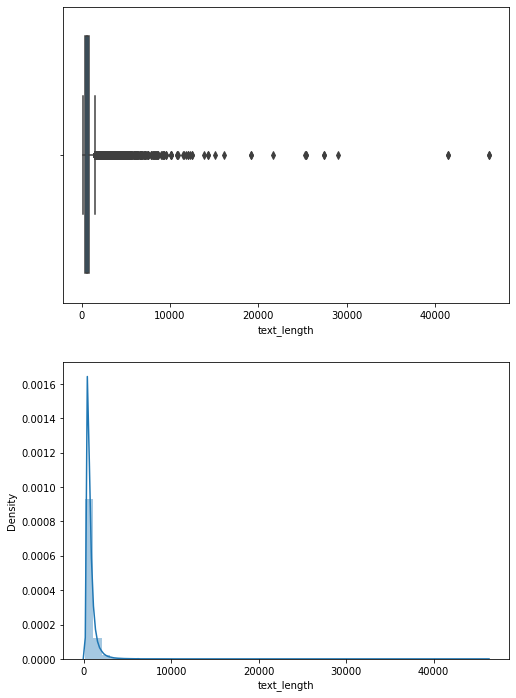

In [49]:
fig = plt.figure(figsize=(8, 12))

fig.add_subplot(211)
sns.boxplot(output['text_length'])

fig.add_subplot(212)
sns.distplot(output['text_length'])

plt.show()

In [50]:
train_val = pd.concat([train_df, val_df])

In [51]:
train_val = train_val.reset_index(drop=True)

In [52]:
type(train_val['answers'][0])

dict

In [53]:
train_val['context_length'] = [len(x) for x in train_val['context']]
train_val['question_length'] = [len(x) for x in train_val['question']]
train_val['answer_length'] = [len(d['text'][0]) for d in train_val['answers']]

/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

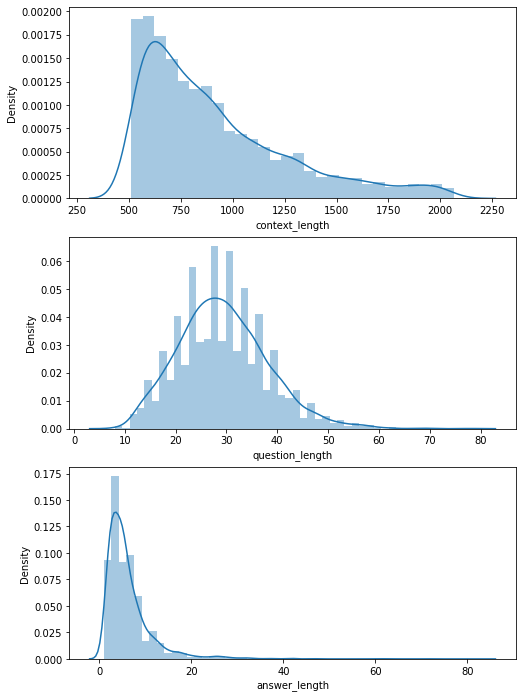

In [54]:
fig = plt.figure(figsize=(8, 12))

fig.add_subplot(311)
sns.distplot(train_val['context_length'])

fig.add_subplot(312)
sns.distplot(train_val['question_length'])

fig.add_subplot(313)
sns.distplot(train_val['answer_length'])

plt.show()

/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


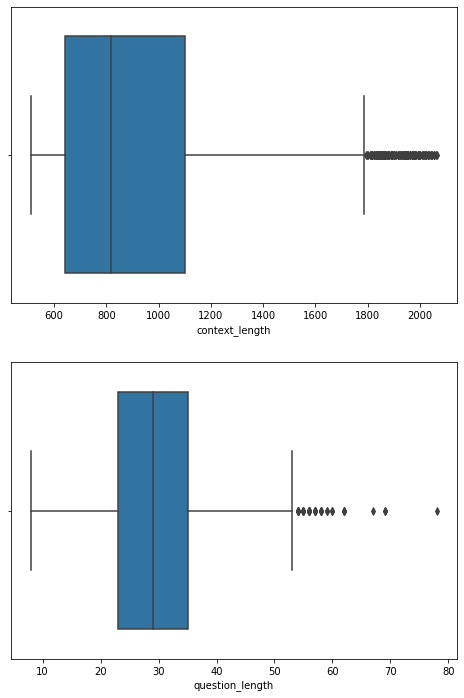

In [55]:
fig = plt.figure(figsize=(8, 12))

fig.add_subplot(211)
sns.boxplot(train_val['context_length'])

fig.add_subplot(212)
sns.boxplot(train_val['question_length'])

plt.show()

In [56]:
print(len(preds))

600


In [57]:
preds_df = pd.DataFrame([preds])
preds_df = preds_df.transpose()
preds_df = preds_df.rename({0:'answer'}, axis=1)

In [58]:
preds_df['answer_length'] = [len(x) for x in preds_df['answer']]

In [66]:
preds_df.head() #question 같이 EDA

,answer,answer_length
mrc-1-000653,"현재 사용되는 의미와 다른 것인가 ? 문장이 풍자적이지는 않은가 ? (즉, 말하는 것",47
mrc-1-001113,냉전,2
mrc-0-002191,대통령인 빌헬름 미클라스,13
mrc-0-003951,뉴질랜드,4
mrc-1-001272,프랑스,3


/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


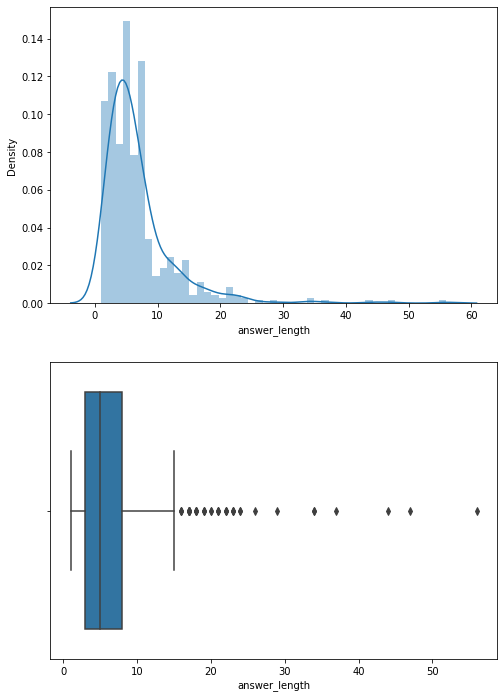

In [60]:
fig = plt.figure(figsize=(8, 12))

fig.add_subplot(211)
sns.distplot(preds_df['answer_length'])

fig.add_subplot(212)
sns.boxplot(preds_df['answer_length'])

plt.show()

In [61]:
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [62]:
train_val['answer'] = [d['text'][0] for d in train_val['answers']]

In [63]:
train_val['num_answers'] = [len(d) for d in train_val['answers']]

In [67]:
train_val.describe()

,document_id,__index_level_0__,context_length,question_length,answer_length,num_answers
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.0
mean,28435.733063,1500.377385,920.020515,29.315124,6.311546,2.0
std,17499.007206,1059.880270,356.661266,8.726480,5.445750,0.0
min,4572.000000,0.000000,512.000000,8.000000,1.000000,2.0
25%,11615.750000,591.750000,643.000000,23.000000,3.000000,2.0
50%,26446.500000,1194.500000,819.000000,29.000000,5.000000,2.0
75%,44250.000000,2422.250000,1100.250000,35.000000,8.000000,2.0
max,60603.000000,3593.000000,2064.000000,78.000000,83.000000,2.0


In [65]:
train_val.head()

,title,context,question,id,answers,document_id,__index_level_0__,context_length,question_length,answer_length,answer,num_answers
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862,32,2,하원,2
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,621,22,8,《경영의 실제》,2
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,850,30,2,백성,2
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,727,39,2,중국,2
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,609,26,2,4개,2
